# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
df_b = data.loc[(data['race'] == 'b')]
df_b.count()

id            2435
ad            2435
education     2435
ofjobs        2435
yearsexp      2435
              ... 
trade         2435
busservice    2435
othservice    2435
missind       2435
ownership     2435
Length: 65, dtype: int64

In [4]:
pd.set_option("display.max_columns", None)

<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

### Question 1

The sample size is over 30, so Z-test will be appropriate test to use. <br>
The samples were randomly selected and  size is above 30, so it should be approximately normally distributed.

### Question 2

Null Hypotheses: The call back of white-sounding names to black-sounding names should be 50% or more<br>
Alternative Hypotheses:  The call back of white-sounding names to black-sounding names should be less than 50% 

black sounding call back mean: 0.0644763857126236
white sounding call back mean: 0.09650924056768417
White and black sounding difference: 1.4968152991365486


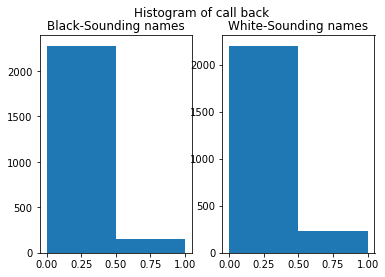

In [10]:
# Your solution to Q3 here

from scipy.stats import bernoulli as ber
import matplotlib.pyplot as plt

df_w = data.loc[(data['race'] == 'w')]
df_b = data.loc[(data['race'] == 'b')]
fig, (ax1,ax2) = plt.subplots(1,2)
fig.suptitle("Histogram of call back")
ax1.hist(x = df_b['call'], bins =2)
ax1.set_title("Black-Sounding names")
ax2.hist(x = df_w['call'], bins = 2)
ax2.set_title("White-Sounding names")

print("black sounding call back mean: " + str(df_b['call'].mean()))
print("white sounding call back mean: " + str(df_w['call'].mean()))
print("White and black sounding difference: " + str(df_w['call'].mean()/df_b['call'].mean()))

black sounding call back mean: 0.06466923
white sounding call back mean: 0.09649309
White and black sounding difference: 1.492102
black sounding call back confidence interval: (0.054907392982040795, 0.07443106519838676)
white sounding call back confidence interval: (0.08475627617269792, 0.10822989924520217)
black sounding call back margin of error: 0.00976183610817298
white sounding call back margin of error: 0.011736811536252126


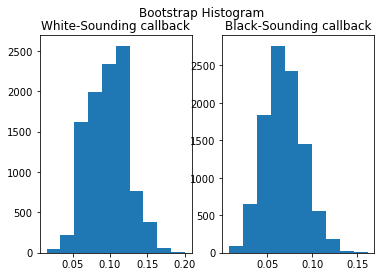

In [6]:
import numpy as np
import scipy.stats as stat
white_bootstrap = []
black_bootstrap = []
confidence_level = 0.95

for i in range(10000):
    sample_n_w = np.random.choice(df_w['call'], size = 130)
    sample_n_b = np.random.choice(df_b['call'], size = 130)
    white_bootstrap.append(sample_n_w.mean())
    black_bootstrap.append(sample_n_b.mean())
    
fig, (ax1,ax2) = plt.subplots(1,2)

fig.suptitle("Bootstrap Histogram")
ax1.hist(white_bootstrap)
ax1.set_title('White-Sounding callback')
ax2.hist(black_bootstrap)
ax2.set_title('Black-Sounding callback')

bootstrap_wmean = np.mean(white_bootstrap)
bootstrap_bmean = np.mean(black_bootstrap)
degree_freedom_w = df_w['call'].size -1
sample_standard_error_w = stat.sem(df_w['call'])
degree_freedom_b = df_b['call'].size -1
sample_standard_error_b = stat.sem(df_b['call'])
confidence_interval_w = stat.t.interval(confidence_level, degree_freedom_w, bootstrap_wmean, sample_standard_error_w)
confidence_interval_b = stat.t.interval(confidence_level, degree_freedom_b, bootstrap_bmean, sample_standard_error_b)
conf_lowb,conf_Hb = confidence_interval_b
conf_loww,conf_Hw = confidence_interval_w
print("black sounding call back mean: " + str(bootstrap_bmean))
print("white sounding call back mean: " + str(bootstrap_wmean))
print("White and black sounding difference: " + str(bootstrap_wmean/bootstrap_bmean))
print("black sounding call back confidence interval: " + str(confidence_interval_b))
print("white sounding call back confidence interval: " + str(confidence_interval_w))
print("black sounding call back margin of error: " + str(conf_Hb - bootstrap_bmean))
print("white sounding call back margin of error: " + str(conf_Hw - bootstrap_wmean))

In [7]:
mean_b = df_b.call.mean()
mean_w = df_w.call.mean()

result = stats.ttest_1samp(a = df_w['call'], popmean = mean_b * 1.5)

pval = result.pvalue
if pval < 0.05:
    print("p-value: " + str(pval))
    print("Reject null hypotheses")
else:
    print("p-value: " + str(pval))
    print("Failed to reject null hypotheses")

p-value: 0.9726351216477749
Failed to reject null hypotheses


In [8]:
df_w.call.mean()

0.09650924056768417

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

### Question 4

Null Hypotheses was "The call back of white-sounding names to black-sounding names should be 50% or more"<br>
Which I failed to reject the null hypotheses since p value was within the confidence interval due to p value over the confidence level. by using t-test

In [12]:
print("p-value: " + str(pval))

p-value: 0.9726351216477749


### Question 5

The race/name has impacted on the call back of resume.<br>
The call back of white sounding name had about 1.5 times more than black sounding name

In [9]:
print("black sounding call back mean: " + str(df_b['call'].mean()))
print("white sounding call back mean: " + str(df_w['call'].mean()))

black sounding call back mean: 0.0644763857126236
white sounding call back mean: 0.09650924056768417
